In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
img1=cv2.imread('image.jpg',0)
img2=cv2.imread('image_2.jpg',0)

In [15]:
sift=cv2.SIFT_create()

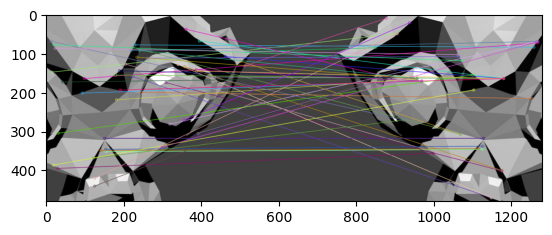

(<matplotlib.image.AxesImage at 0x2c9efe80cd0>, None)

In [16]:
# detect and compute the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(des1,des2)

# sort the matches based on distance
matches = sorted(matches, key=lambda val: val.distance)

# Draw first 50 matches.
out = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
plt.imshow(out), plt.show()

In [17]:
flann=cv2.FlannBasedMatcher(dict(algorithm=1,trees=10),dict())
matches=flann.knnMatch(des1,des2,k=2)

In [18]:
good_matches=[]
for m, n in matches:
  if m.distance <0.7*n.distance:
    good_matches.append(m)



In [ ]:
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
# pts2 = np.float32([kp2[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

In [22]:

M, mask=cv2.estimateAffine2D(pts1,pts2)
aligned =cv2.warpAffine(img2,M,(img1.shape[1]+img2.shape[1],img1.shape[0]))

In [23]:
panorma=np.copy(aligned)
panorma[0:img1.shape[0],0:img1.shape[1]]=img1

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

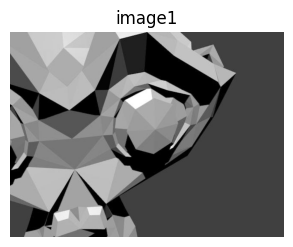

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.title("image1")
plt.axis('off')


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

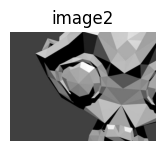

In [25]:
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.title("image2")
plt.axis('off')

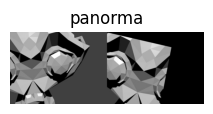

In [26]:
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(panorma,cv2.COLOR_BGR2RGB))
plt.title("panorma")
plt.axis('off')
plt.tight_layout()
plt.show()

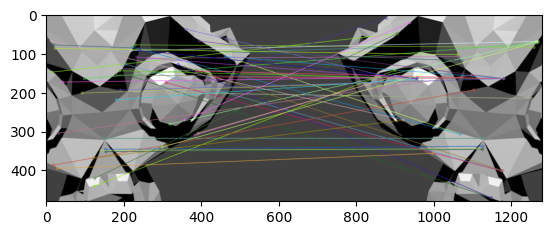

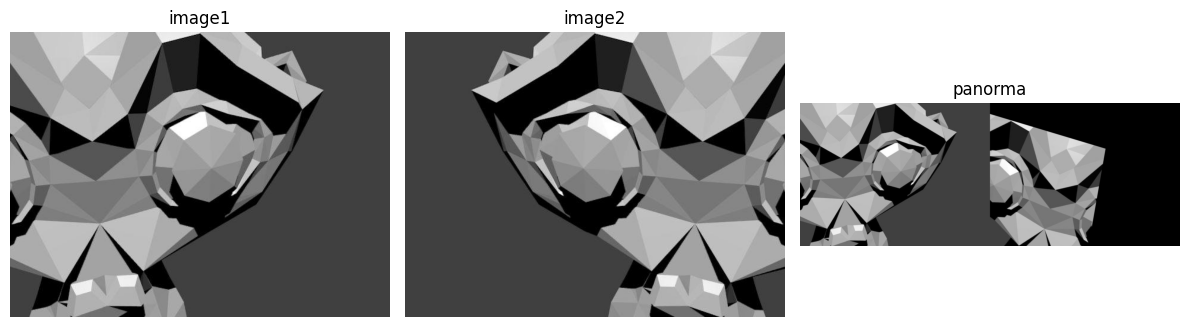

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2

import matplotlib.pyplot as plt

# Read images
img1 = cv2.imread('image.jpg', 0)
img2 = cv2.imread('image_2.jpg', 0)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect and compute the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.match(des1, des2)

# Sort the matches based on distance
matches = sorted(matches, key=lambda val: val.distance)

# Draw first 50 matches
out = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
plt.imshow(out), plt.show()

# Create FLANN based matcher
flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10), dict())
matches = flann.knnMatch(des1, des2, k=2)

# Store all the good matches as per Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Extract location of good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find the affine transformation matrix
M, mask = cv2.estimateAffine2D(pts1, pts2)

# Warp the second image to align with the first
aligned = cv2.warpAffine(img2, M, (img1.shape[1] + img2.shape[1], img1.shape[0]))

# Create panorama
panorma = np.copy(aligned)
panorma[0:img1.shape[0], 0:img1.shape[1]] = img1

# Plot the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("image1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("image2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(panorma, cv2.COLOR_BGR2RGB))
plt.title("panorma")
plt.axis('off')
plt.tight_layout()
plt.show()

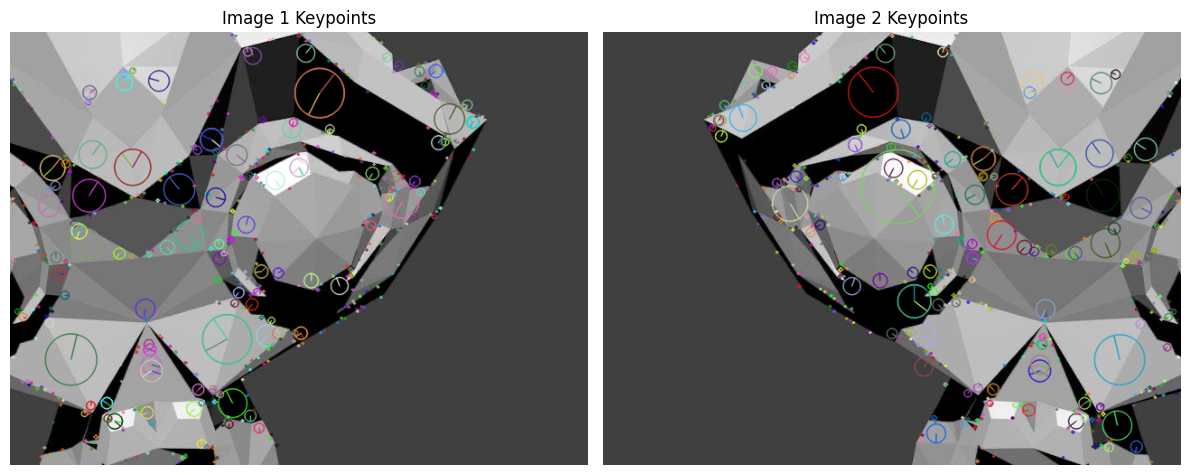

In [28]:
# Draw keypoints on the images
img1_keypoints = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_keypoints = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the images with keypoints
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Image 1 Keypoints")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Image 2 Keypoints")
plt.axis('off')

plt.tight_layout()
plt.show()

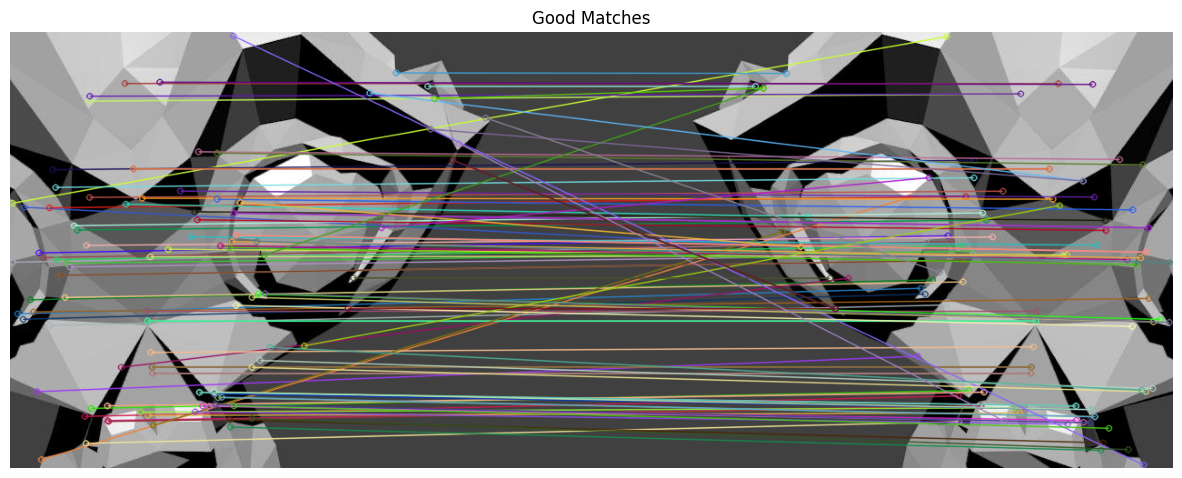

In [30]:
# Draw matches between the keypoints of the two images
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plot the matches
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Good Matches")
plt.axis('off')
plt.show()